In [38]:
import numpy as np
import elimination_ordering_nx as eo
import time, pickle
from os import listdir
from os.path import isfile, join
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors

import importlib
importlib.reload(eo)

<module 'elimination_ordering_nx' from '/users/baribowo/Code/Python/eli/elimination_ordering_nx.py'>

q = [ 2  4  8 16 32 64]
p = [ 2  4  8 16 32 64]


==================Length of stack's elements after stack modification==================

=-=-=--=-=-=-=--=--=-=
<><><> Grid with p = 2 q = 2 <><><>

>>>>>Statistics<<<<<<
Total number of times each rule in Normalize stage is effective for all rounds:
Rule 1 :  3 times
Rule 2 :  0 times
Rule 3 :  0 times
Rule 4 :  1 times
Rule 5 :  0 times
Rule 6 :  0 times
Total number of hits in all loops (one loop counts as 1 (includes any O(constant) operations)) =  9
computation for grid 2 x 2 is finished!

=-=-=--=-=-=-=--=--=-=
<><><> Grid with p = 4 q = 4 <><><>
after separate stage:  [4, 4, 4] , mean component size =  4
after popping top:  [4, 4] , mean component size =  4

>>>>>Statistics<<<<<<
Total number of times each rule in Normalize stage is effective for all rounds:
Rule 1 :  5 times
Rule 2 :  0 times
Rule 3 :  2 times
Rule 4 :  5 times
Rule 5 :  0 times
Rule 6 :  0 times
Total number of vertices placed in Separate stage per round:
Round

after separate stage:  [4, 2014, 2014] , mean component size =  1344
after separate stage:  [4, 70, 944, 956, 2014] , mean component size =  798
after separate stage:  [4, 50, 70, 431, 433, 956, 2014] , mean component size =  565
after separate stage: [4,36,50, ...(438)... ,431,956,2014]
after separate stage: [4,26,36, ...(357)... ,431,956,2014]
after separate stage: [4,19,23, ...(301)... ,431,956,2014]
after separate stage: [4,4,4, ...(261)... ,431,956,2014]
after popping top: [4,4,14, ...(279)... ,431,956,2014]
after popping top: [4,14,19, ...(300)... ,431,956,2014]
after removing duplicates: [4,19,23, ...(324)... ,431,956,2014]
after popping top: [4,19,26, ...(352)... ,431,956,2014]
after removing duplicates: [4,26,36, ...(385)... ,431,956,2014]
after separate stage: [4,4,4, ...(320)... ,431,956,2014]
after popping top: [4,4,26, ...(349)... ,431,956,2014]
after popping top: [4,26,36, ...(384)... ,431,956,2014]
after removing duplicates: [4,36,50, ...(469)... ,431,956,2014]
after sep

after separate stage: [4,6,6, ...(152)... ,956,993,2014]
after separate stage: [4,6,6, ...(149)... ,956,993,2014]
after separate stage: [4,6,6, ...(146)... ,956,993,2014]
after popping top: [4,6,6, ...(147)... ,956,993,2014]
after popping top: [4,6,6, ...(149)... ,956,993,2014]
after separate stage: [4,6,6, ...(146)... ,956,993,2014]
after popping top: [4,6,6, ...(147)... ,956,993,2014]
after popping top: [4,6,6, ...(149)... ,956,993,2014]
after separate stage: [4,6,6, ...(146)... ,956,993,2014]
after separate stage: [4,6,6, ...(143)... ,956,993,2014]
after popping top: [4,6,6, ...(144)... ,956,993,2014]
after popping top: [4,6,6, ...(146)... ,956,993,2014]
after removing duplicates: [4,6,6, ...(148)... ,956,993,2014]
after popping top: [4,6,6, ...(149)... ,956,993,2014]
after separate stage: [4,6,6, ...(146)... ,956,993,2014]
after separate stage: [4,6,6, ...(143)... ,956,993,2014]
after separate stage: [4,4,6, ...(140)... ,956,993,2014]
after popping top: [4,6,6, ...(141)... ,956,993

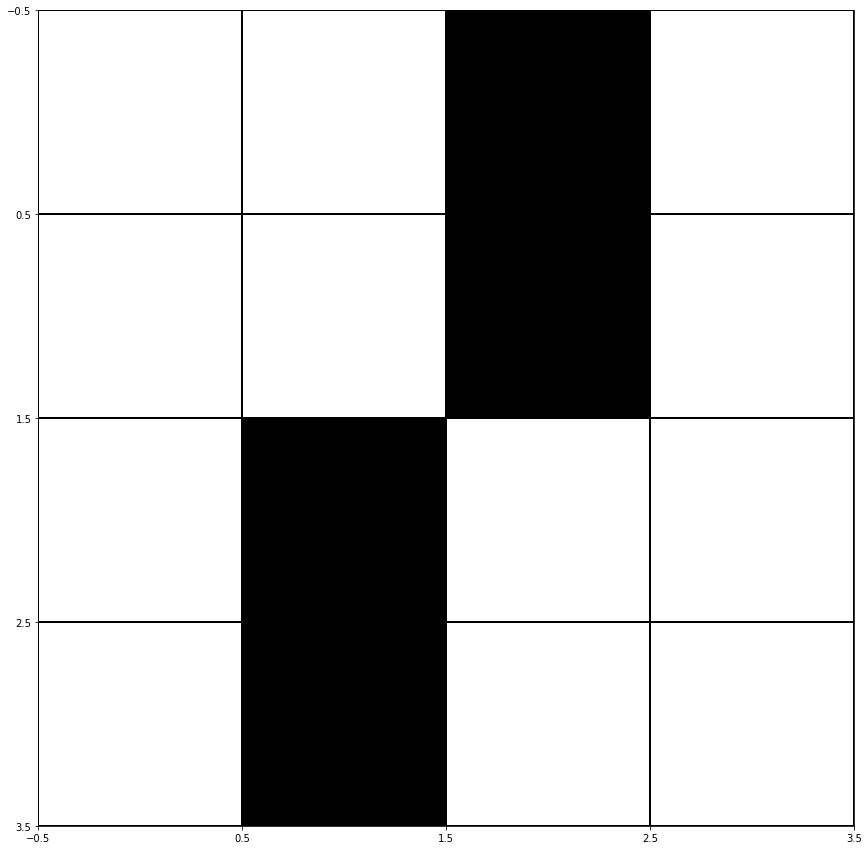


<><><> Separators for p = 8 q = 8 <><><>


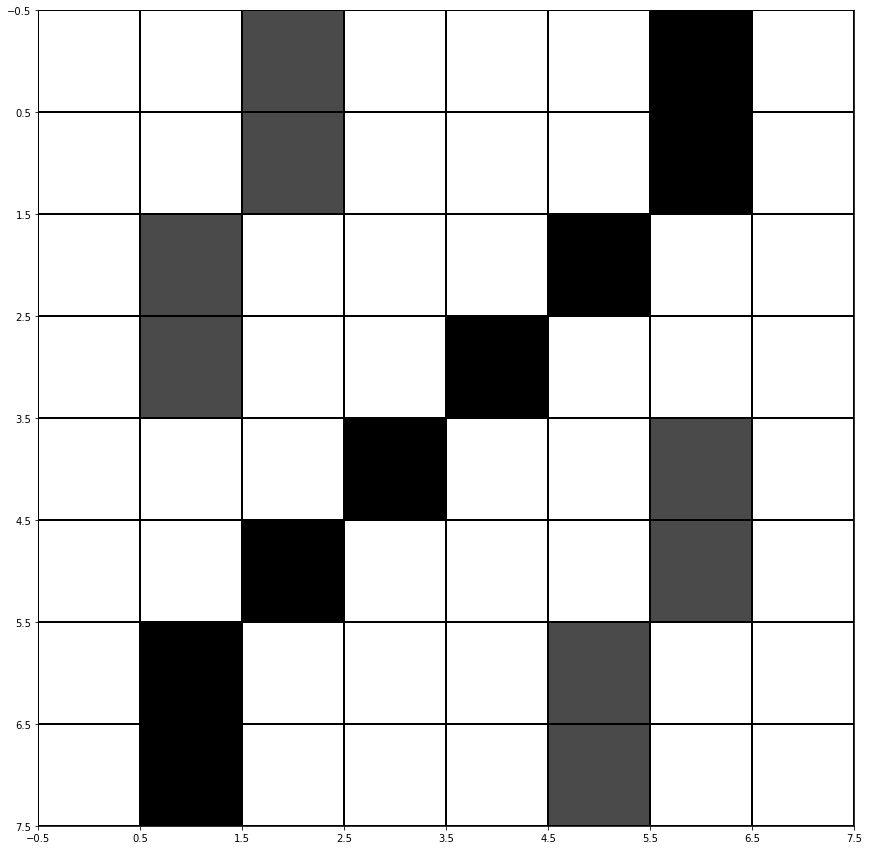


<><><> Separators for p = 16 q = 16 <><><>


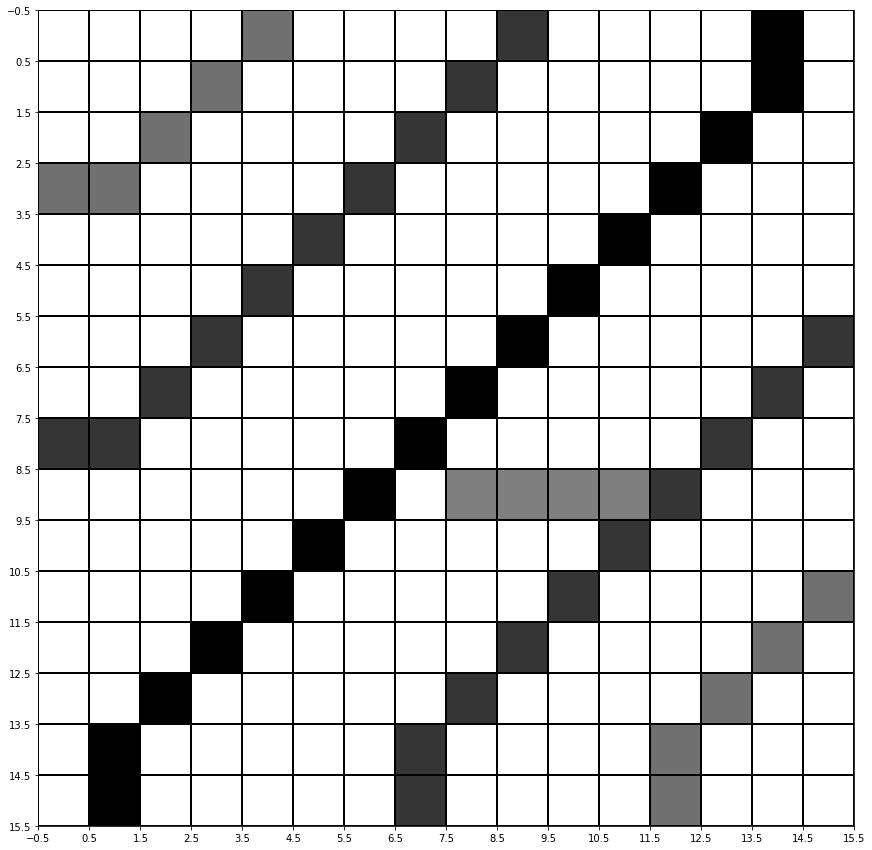


<><><> Separators for p = 32 q = 32 <><><>


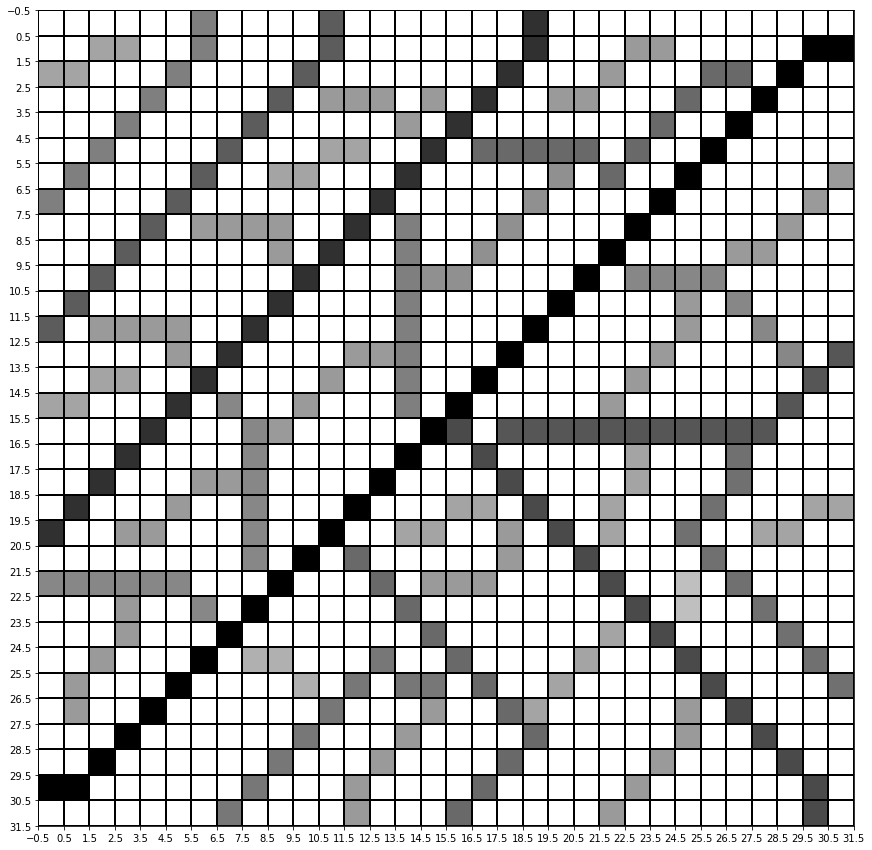


<><><> Separators for p = 64 q = 64 <><><>


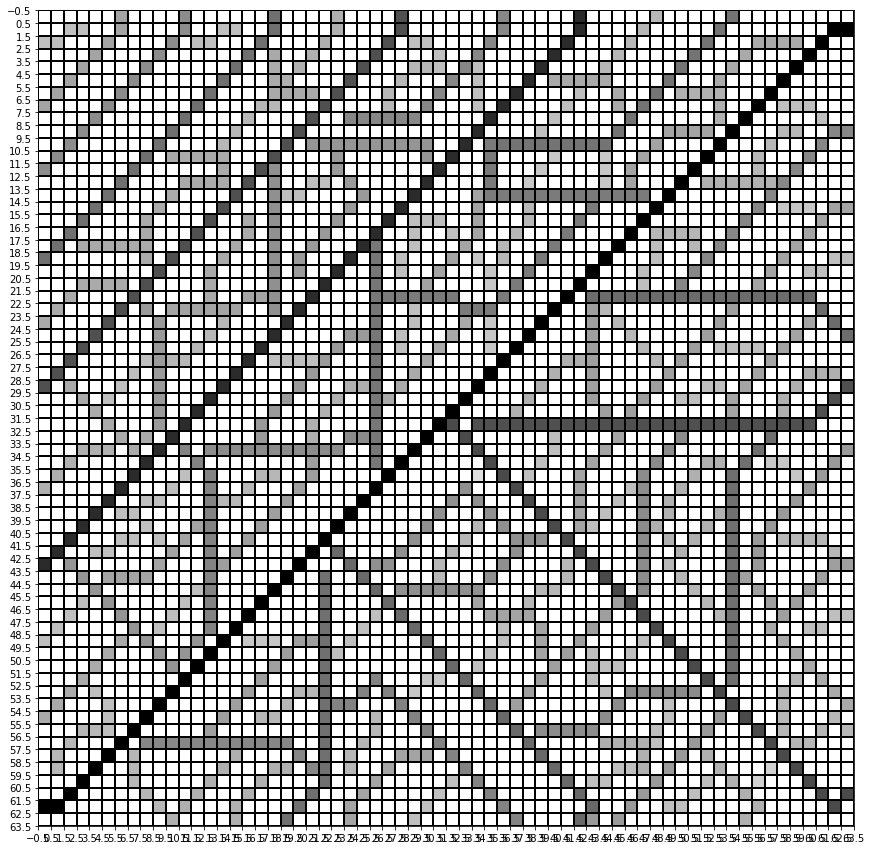

In [39]:
plt.rcParams["figure.figsize"] = (20,15)
k = np.array(list(range(1,7)))
q = p = np.power(2,k)
print("q =",q)
print("p =",p)
info = {
    "R_counts":[],
    "separate_placed_rounds":[],
    "Nks":[]
       }
print("\n\n==================Length of stack's elements after stack modification==================")
for i in range(len(p)):
    print("\n=-=-=--=-=-=-=--=--=-=")
    print("<><><> Grid with p =",p[i],"q =",q[i],"<><><>")
    grid = eo.grid_generator(p[i],q[i]) #generate grid matrix

    #elimination ordering:
    EO = eo.elimination_ordering_class(grid, visualization=True, p=p[i], q=q[i]) #must be on global scope
    #e, R_counts, separate_placed_rounds = EO.elimination_ordering(grid) #if visualization=True
    e = EO.elimination_ordering()
    #info["R_counts"].append(R_counts); info["separate_placed_rounds"].append(separate_placed_rounds)
    info["Nks"].append(EO.Nks)
    
    print("computation for grid",p[i],"x",q[i],"is finished!")
    
#display the separator grids:
print("\n\n==================Separators visualization==================")
for i in range(len(p)):
    if len(info["Nks"][i]) > 0:
        print("\n<><><> Separators for p =",p[i],"q =",q[i],"<><><>")
        eo.generate_separator_display(p[i], q[i], info["Nks"][i])